<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Введение

###### Состав полей датасета:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата
###### Целевой признак
* Exited — факт ухода клиента

Для построения модели мы подготовим данные, обучим несколько моделей и по значению метрики выберем лучшую. Ее проверим затем на тестовой выборке.

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Все поля кроме Tenure (сколько лет человек явл клиентом банка) заполнены.Число клиентов с пустой графой 900 человек - вероятно эти клиенты обслуживаются меньше года - заменим пропущенные значения на нули. Типы данных в порядке.

In [5]:
df['Tenure'].fillna(0, inplace = True)

In [6]:
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Полных дублей нет, проверим на неявные дубли. Имеет смысл проверить только поле с айди и полом

In [7]:
df[df.duplicated(['CustomerId'])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Пол и страна могут повлиять на исследование - сделаем столбец категориальным, чтобы учесть.

In [10]:
df = pd.get_dummies(df, prefix=['Gen', 'Geo'], columns=['Gender', 'Geography'], drop_first = True)

In [11]:
#encoder = OrdinalEncoder()
#ordinal_df = pd.DataFrame(encoder.fit_transform(df),
#                            columns=df.columns)

Для исследования не нужны все столбцы - сохраним в датафрейм только те, что могут оказывать влияние.

In [12]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  float64
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Gen_Male         10000 non-null  uint8  
 10  Geo_Germany      10000 non-null  uint8  
 11  Geo_Spain        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 810.5 KB


## Исследование задачи

Мы хотим обучить модель, которая предскажет уйдет ли клиент.Целевой признак категориальный, мы решаем задачу бинарной классификации, модель будем подбирать соответственно из тех, что решают именно задачу классификации - Дерево решений, Случайный лес, Логистическая регрессия. Сравним качество моделей и выберем более точную.

In [14]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gen_Male,Geo_Germany,Geo_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,1,0


###### Проверим наличие корреляции между признаками, чтобы не "запутать" модель, если она есть:

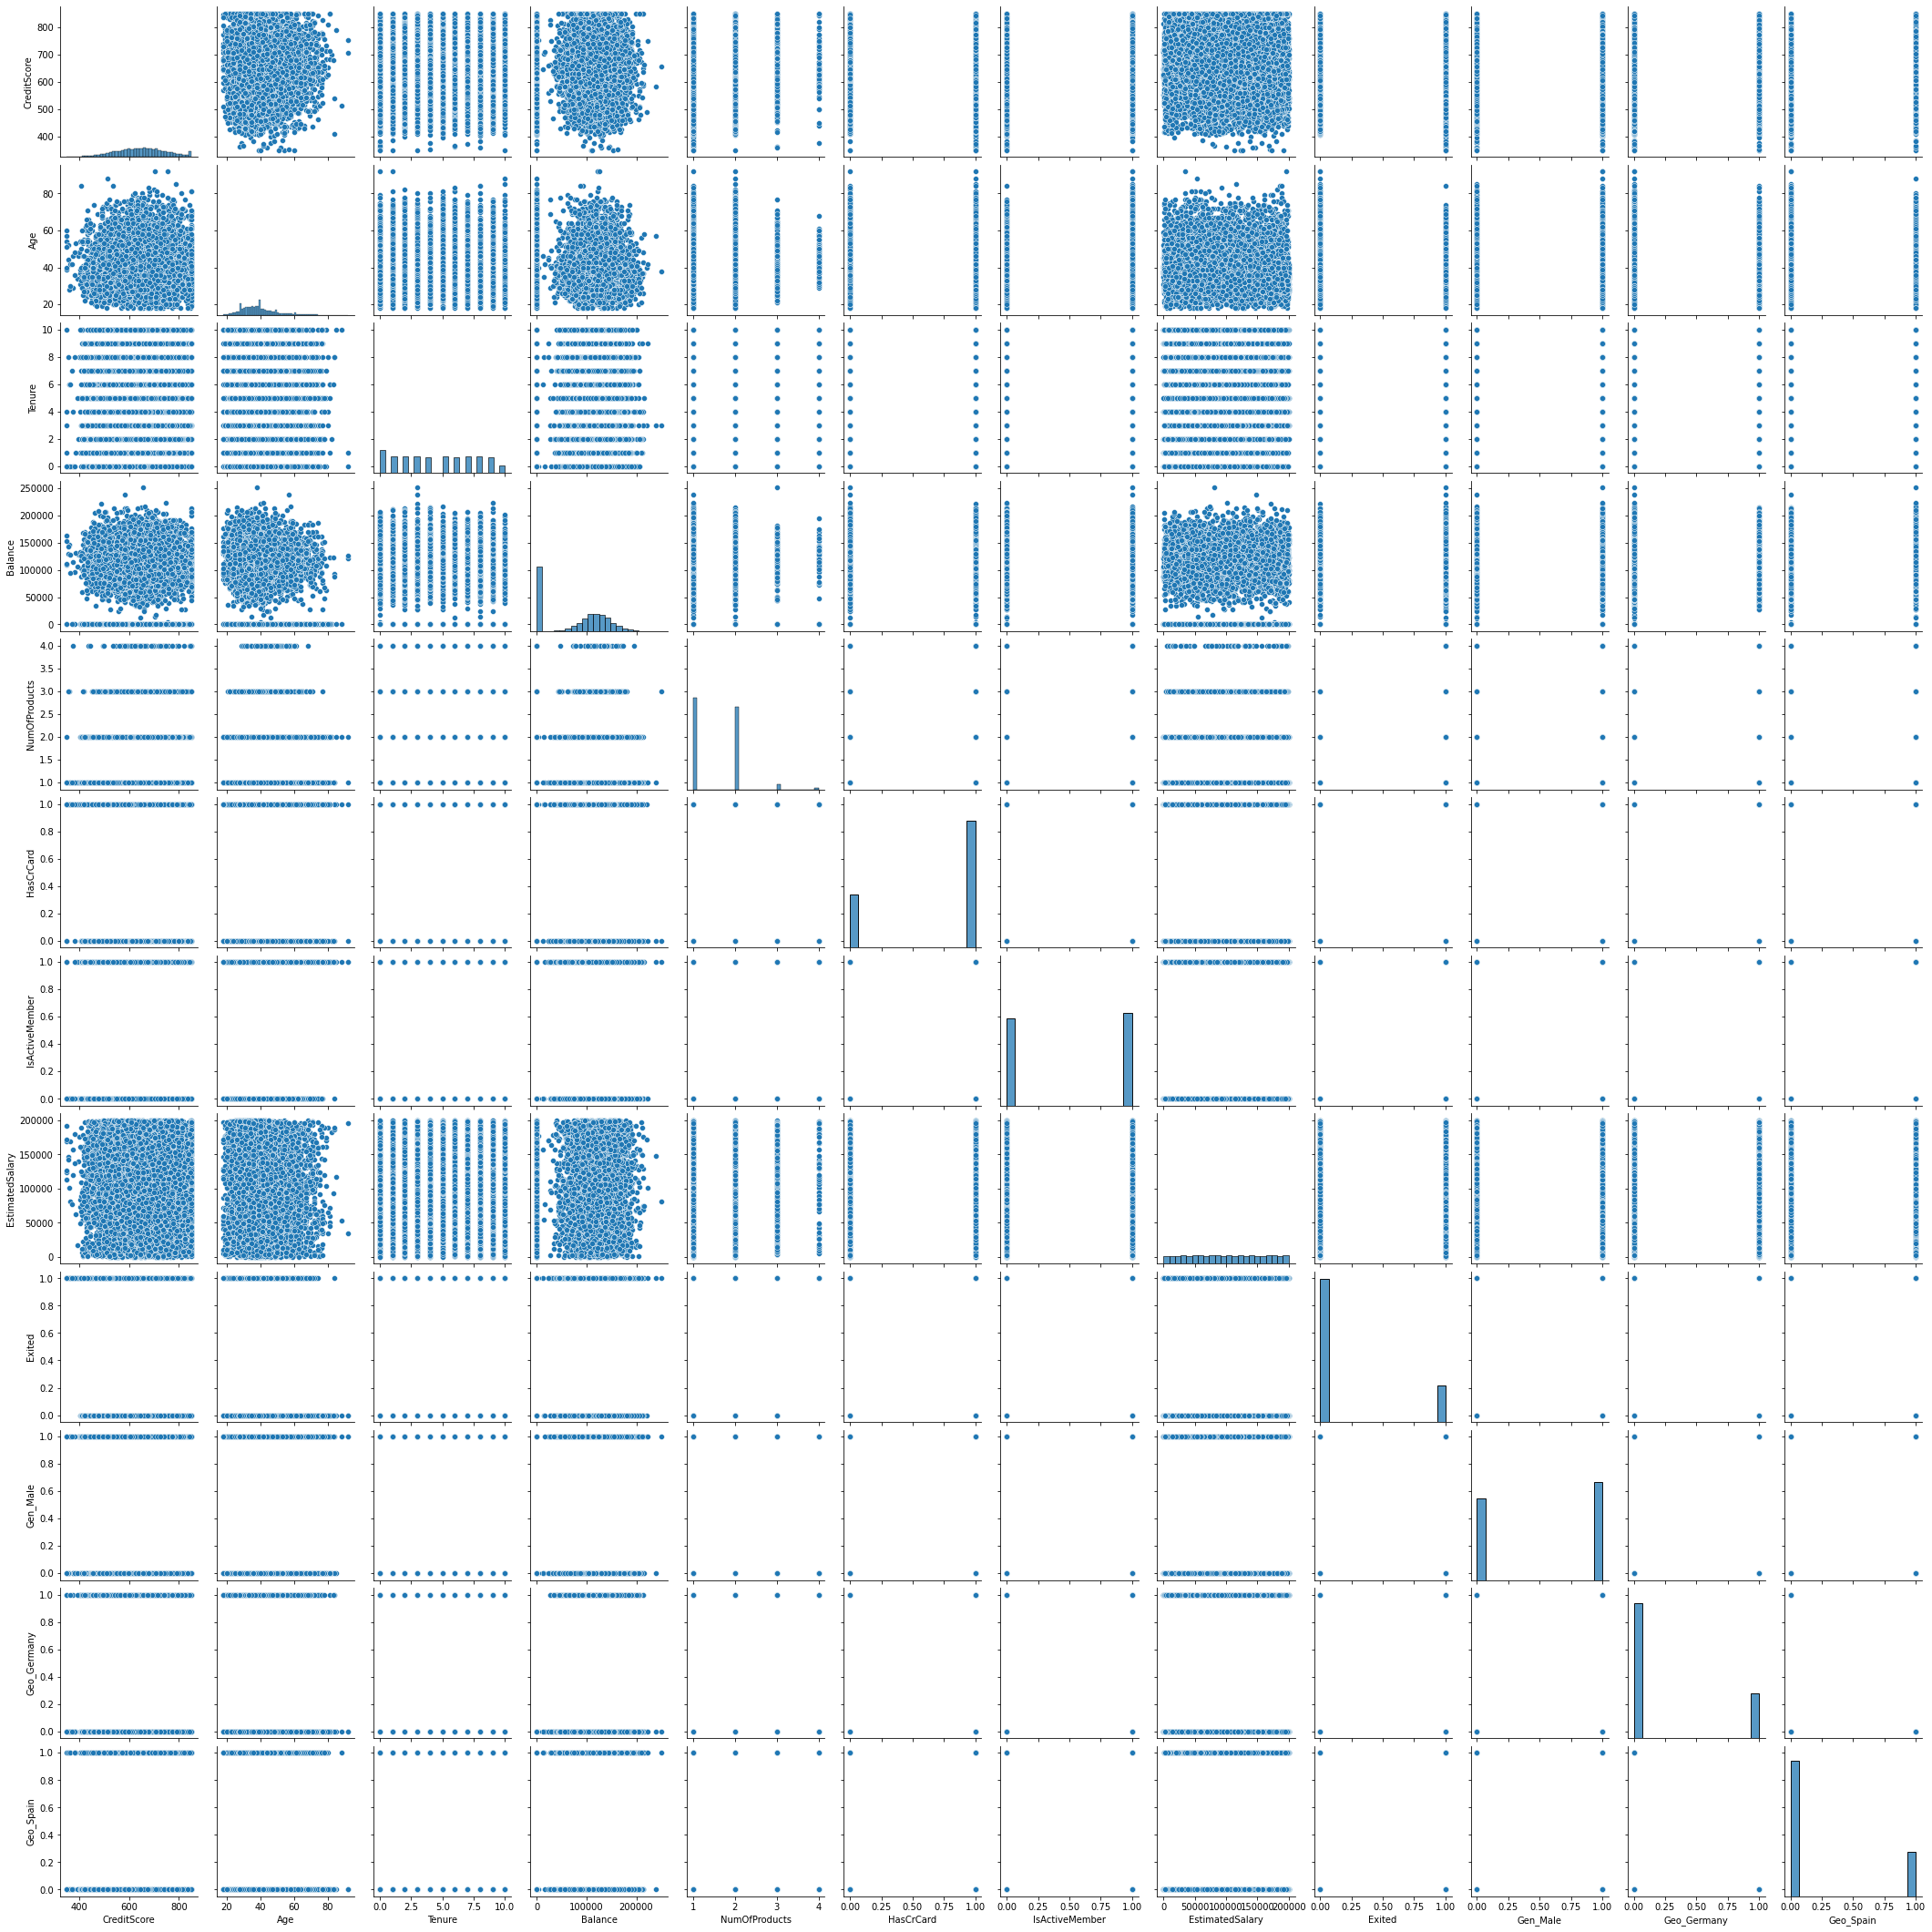

In [15]:
sns.pairplot(df.iloc[:,:])

Очевидной корреляции нет

###### Разделим выборку на тренировочную, валидационную и тестовую.

In [16]:
target = df['Exited']
features = df.drop(['Exited'] , axis=1)
train_features, valid_features, train_target, valid_target = train_test_split(features, 
                                                                              target, test_size=0.4, random_state =12345)
    
valid_features, test_features, valid_target, test_target = train_test_split(valid_features, 
                                                                            valid_target, test_size=0.5, random_state =12345)

###### Посмотрим на баланс классов целевого признака

0    0.7963
1    0.2037
Name: Exited, dtype: float64


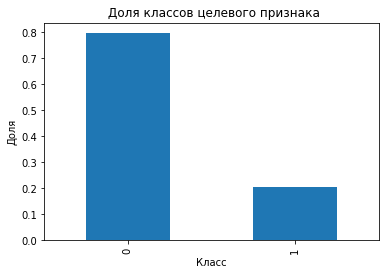

In [17]:
import matplotlib.pyplot as plt

class_frequency  =  df['Exited'].value_counts(normalize = True)
print(class_frequency)
class_frequency.plot(kind = 'bar')
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.title(' Доля классов целевого признака');

###### Чтобы модель не считала одни признаки более значимыми чем другие из-за масштаба - мы их стандартизируем.

In [18]:
pd.options.mode.chained_assignment = None
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(train_features[numeric]) 
train_features[numeric] = scaler.transform(train_features[numeric])
valid_features[numeric] = scaler.transform(valid_features[numeric])
test_features[numeric] = scaler.transform(test_features[numeric])

###### Обучим первую модель - Дерево решений, оценим баланс классов и его влияение на обучение

In [19]:
#model = DecisionTreeClassifier(random_state=12345)
#model.fit(train_features, train_target)
#predicted_valid = model.predict(valid_features)

#print(confusion_matrix(valid_target, predicted_valid))
#sns.heatmap(confusion_matrix(valid_target, predicted_valid), annot=True)

[[1368  214]
 [ 209  209]]


In [20]:
report = classification_report(valid_target,predicted_valid)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1582
           1       0.49      0.50      0.50       418

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000



Модель плохо предсказывает единицы, также очевидно есть дисбаланс классов. Для дальнейшего обучения сбалансируем.

## Борьба с дисбалансом

Сбалансируем наши классы и выберем лучшую модель.

###### Обучим дерево решений

In [21]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(train_features, train_target)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.456359102244389
ROC_AUC: 0.6553723407472826


Попробуем подобрать гиперпараметры и посмотреть на результат работы модели

In [22]:
parametrs = { 'max_depth': range (1,13, 2)}
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(train_features, train_target)
grid.best_params_


{'max_depth': 7}

In [23]:
model = DecisionTreeClassifier(random_state=12345,class_weight = 'balanced', max_depth=7)
model.fit(train_features, train_target)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.5565565565565564
ROC_AUC: 0.736771030553052


###### Обучим случайный лес

In [24]:
model = RandomForestClassifier(random_state=12345,class_weight = 'balanced')
model.fit(train_features, train_target)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.5744680851063829
ROC_AUC: 0.7099577181086264


In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(train_features, train_target, 4)

model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.6015831134564644
ROC_AUC: 0.7373290426387772


In [26]:
target_upsampled.value_counts()

0    4804
1    4784
Name: Exited, dtype: int64

In [27]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2)}
clf = RandomForestClassifier()
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_upsampled, target_upsampled)
grid.best_params_

{'max_depth': 11, 'n_estimators': 50}

In [28]:
model = RandomForestClassifier(random_state=12345, max_depth = 11, n_estimators= 40)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.6169491525423729
ROC_AUC: 0.7652402325201579


Увеличение выборки позволило улучшить качество модели, баланс классов заметно улучшился.

In [29]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(train_features, train_target, 0.2)

model = RandomForestClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.5608919382504288
ROC_AUC: 0.7580889069012031


In [30]:
target_downsampled.value_counts()

1    1196
0     961
Name: Exited, dtype: int64

In [31]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2)}
clf = RandomForestClassifier()
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_downsampled, target_downsampled)
grid.best_params_

{'max_depth': 11, 'n_estimators': 50}

In [32]:
model = RandomForestClassifier(random_state=12345, max_depth = 7, n_estimators= 50)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.5728987993138938
ROC_AUC: 0.768674502023361


Попробуем подобрать гиперпараметры и посмотреть на результат работы модели

In [33]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2)}
clf = RandomForestClassifier()
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(train_features, train_target)
grid.best_params_


{'max_depth': 11, 'n_estimators': 30}

In [34]:
model = RandomForestClassifier(random_state=12345,class_weight = 'balanced',  max_depth = 11, n_estimators= 50)
model.fit(train_features, train_target)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.6165413533834587
ROC_AUC: 0.7519069193498629


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Из более продвинутых вариантов для подбора гиппермараметров можно выделить библиотеку [hyperopt](https://hyperopt.github.io/hyperopt/) или библиотеку [optuna](https://optuna.org/#code_examples).


In [35]:
model = RandomForestClassifier(random_state=12345,class_weight = 'balanced', max_depth = 9, n_estimators = 40)
model.fit(train_features, train_target)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.6228373702422145
ROC_AUC: 0.7663925501605987


###### Обучим логистическую регрессию:

In [36]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(train_features, train_target)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.33389544688026984
ROC_AUC: 0.5944008250715284


In [37]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight = 'balanced')
model.fit(train_features, train_target)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.4888888888888888
ROC_AUC: 0.6948233415396898


Метрика стала выше, но качественно для нас ничего не меняется - модель работает плохо. Также ROC-AUC симметрична относительно 0.5 и модель без балансировки дает худший результат из возможных. Попробуем увеличить и уменьшить выборку.

In [38]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(train_features, train_target, 4)

model = LogisticRegression(random_state = 12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.4888888888888888
ROC_AUC: 0.6948233415396898


In [39]:
target_upsampled.value_counts()

0    4804
1    4784
Name: Exited, dtype: int64

In [40]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(train_features, train_target, 0.3)

model = LogisticRegression(random_state = 12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(valid_features)
print("F1:", f1_score(valid_target, predicted_valid))
print('ROC_AUC:', roc_auc_score(valid_target, predicted_valid))

F1: 0.4985835694050992
ROC_AUC: 0.696636502761328


In [41]:
target_downsampled.value_counts()

0    1441
1    1196
Name: Exited, dtype: int64

Баланс также более выражен, чем в изначальной выборке.

Кажется, логистическая регрессия дает самый слабый результат, лучше всех показала себя модель Случайный лес с гиперпараметрами и сбалансированными классами.

<div class="alert alert-info">
<b>Алина:</b>
<br> Поправила и добавила) 
</div>

<div class="alert alert-info">
<b>Алина:</b>
<br> Сделала для дерева, для регрессии с гиперпараметрами не разобралась(
</div>

## Тестирование модели

Прогоним лучшую модель на тестовой выборке.

In [42]:
model = RandomForestClassifier(random_state=12345,class_weight = 'balanced', max_depth = 9, n_estimators = 40)
model.fit(train_features, train_target)
predicted_test = model.predict(test_features)
print("F1:", f1_score(test_target, predicted_test))
print('ROC_AUC:', roc_auc_score(test_target, predicted_test))

F1: 0.6002265005662515
ROC_AUC: 0.7514125183076464


На тестовой выборке модель также показала относительно неплохое качество.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*